In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats
import pickle

In [14]:
cancer='blca'
can='BLCA'
path='SNN'

In [21]:
with open('/home/wbjeong/cancer/JJM/WSI/Data4/tcga_blca_PorpoiseMMF_nll_surv_a0.0_/home/wbjeong/cancer/JJM/code/datasets_gc32_bilinear_s1/split_latest_val_0_results.pkl', 'rb') as f:
    data = pickle.load(f)

In [28]:
df1=pd.DataFrame(data)

In [27]:
samples=pd.read_csv('/home/wbjeong/cancer/JJM/code/datasets_csv_mutsig/tcga_'+cancer+'_all_clean.csv.zip')

In [69]:
high_list=[]
low_list=[]
for i in range(0,5):
    with open('/home/wbjeong/cancer/JJM/WSI/Data4/tcga_blca_PorpoiseMMF_nll_surv_a0.0_/home/wbjeong/cancer/JJM/code/datasets_gc32_bilinear_s1/split_latest_val_'+str(i)+'_results.pkl', 'rb') as f:
        data = pickle.load(f)
        df1=pd.DataFrame(data)
    BLCA_risk = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/BLCA_risk'+str(i)+'.csv')
    BLCA_risk=np.transpose(pd.DataFrame([df1.columns,df1.iloc[1,:]]))
    BLCA_risk.iloc[:,0]=range(0,len(BLCA_risk))
    ab=[]
    for k in BLCA_risk.iloc[:,1]:
        ab.append(k[0])
    BLCA_risk.iloc[:,1]=ab

    BLCA_name = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/'+str(i)+'.csv')
    BLCA_name=np.transpose(pd.DataFrame([df1.columns,df1.columns]))
    BLCA_name.iloc[:,0]=range(0,len(BLCA_name))
    BLCA_risk.iloc[:,0]=list(BLCA_name.iloc[:,1])
    BLCA_risk.columns=['0','1']
    BLCA_risk=BLCA_risk.sort_values('0')
    for j in BLCA_risk[BLCA_risk.iloc[:,1]>np.percentile(BLCA_risk.iloc[:,1],50)].iloc[:,0]:
        high_list.append(j)
    for j in BLCA_risk[BLCA_risk.iloc[:,1]<np.percentile(BLCA_risk.iloc[:,1],50)].iloc[:,0]:
        low_list.append(j)

In [70]:
samples.index=samples['case_id']
H=samples.loc[high_list,:]['survival_months']
HC=1-samples.loc[high_list,:]['censorship']
L=samples.loc[low_list,:]['survival_months']
LC=1-samples.loc[low_list,:]['censorship']

In [12]:
for i in range(0,5):
    BLCA_risk = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/BLCA_risk'+str(i)+'.csv')
    BLCA_name = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/'+str(i)+'.csv')
    if i==0:
        BLCA_risk.iloc[:,0]=list(BLCA_name.iloc[:,1])
        BLCA_risk1=BLCA_risk
    else:
        BLCA_risk.iloc[:,0]=list(BLCA_name.iloc[:,1])
        BLCA_risk1=pd.concat([BLCA_risk1,BLCA_risk])
BLCA_risk=BLCA_risk1.sort_values('0')
high=BLCA_risk.iloc[:int(len(BLCA_risk)/2),:]
high=high[~high.iloc[:,0].isin(['TCGA-ZF-AA58'])]
low=BLCA_risk.iloc[int(len(BLCA_risk)/2):,:]
samples.index=samples['case_id']
H=samples.loc[high.iloc[:,0],:]['survival_months']
HC=1-samples.loc[high.iloc[:,0],:]['censorship']
L=samples.loc[low.iloc[:,0],:]['survival_months']
LC=1-samples.loc[low.iloc[:,0],:]['censorship']

In [66]:
for i in range(0,5):
    with open('/home/wbjeong/cancer/JJM/WSI/Data4/tcga_blca_PorpoiseMMF_nll_surv_a0.0_/home/wbjeong/cancer/JJM/code/datasets_gc32_bilinear_s1/split_latest_val_'+str(i)+'_results.pkl', 'rb') as f:
        data = pickle.load(f)
        df1=pd.DataFrame(data)
    BLCA_risk = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/BLCA_risk'+str(i)+'.csv')
    BLCA_risk=np.transpose(pd.DataFrame([df1.columns,df1.iloc[1,:]]))
    BLCA_risk.iloc[:,0]=range(0,len(BLCA_risk))
    ab=[]
    for k in BLCA_risk.iloc[:,1]:
        ab.append(k[0])
    BLCA_risk.iloc[:,1]=ab

    BLCA_name = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/'+str(i)+'.csv')
    BLCA_name=np.transpose(pd.DataFrame([df1.columns,df1.columns]))
    BLCA_name.iloc[:,0]=range(0,len(BLCA_name))
    if i==0:
        BLCA_risk.iloc[:,0]=list(BLCA_name.iloc[:,1])
        BLCA_risk1=BLCA_risk
    else:
        BLCA_risk.iloc[:,0]=list(BLCA_name.iloc[:,1])
        BLCA_risk1=pd.concat([BLCA_risk1,BLCA_risk])
BLCA_risk1.columns=['0','1']
BLCA_risk=BLCA_risk1.sort_values('0')
high=BLCA_risk.iloc[:int(len(BLCA_risk)/2),:]
high=high[~high.iloc[:,0].isin(['TCGA-ZF-AA58'])]
low=BLCA_risk.iloc[int(len(BLCA_risk)/2):,:]
samples.index=samples['case_id']
H=samples.loc[high.iloc[:,0],:]['survival_months']
HC=1-samples.loc[high.iloc[:,0],:]['censorship']
L=samples.loc[low.iloc[:,0],:]['survival_months']
LC=1-samples.loc[low.iloc[:,0],:]['censorship']

In [ ]:
BLCA_name = pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/'+str(i)+'.csv')
BLCA_name=np.transpose(pd.DataFrame([df1.columns,df1.columns]))

In [58]:
ab=[]
for k in BLCA_risk.iloc[:,1]:
    ab.append(k[0])

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [61]:
BLCA_risk

,0,1
0,TCGA-2F-A9KO,[-3.626877]
1,TCGA-2F-A9KQ,[-3.564201]
2,TCGA-2F-A9KR,[-3.6611423]
3,TCGA-4Z-AA80,[-3.6774797]
4,TCGA-4Z-AA86,[-3.5343184]
...,...,...
70,TCGA-ZF-A9R4,[-3.5941365]
71,TCGA-ZF-A9R7,[-3.6755884]
72,TCGA-ZF-A9R9,[-3.3381407]
73,TCGA-ZF-A9RC,[-3.6212626]


In [42]:
BLCA_name

,Unnamed: 0,0
0,0,TCGA-2F-A9KT
1,1,TCGA-4Z-AA7S
2,2,TCGA-5N-A9KM
3,3,TCGA-BL-A13I
4,4,TCGA-BL-A3JM
...,...,...
69,69,TCGA-ZF-AA4T
70,70,TCGA-ZF-AA4W
71,71,TCGA-ZF-AA52
72,72,TCGA-ZF-AA54


In [36]:
H.mean()

26.78471794871795

In [38]:
pd.DataFrame(H)

,survival_months
case_id,
TCGA-ZF-A9RD,13.40
TCGA-4Z-AA86,10.22
TCGA-DK-A2I4,142.67
TCGA-GC-A3BM,21.39
TCGA-UY-A8OD,112.75
...,...
TCGA-G2-A2ES,32.98
TCGA-G2-A2ES,32.98
TCGA-K4-A5RH,9.07


(0.0, 1.0)

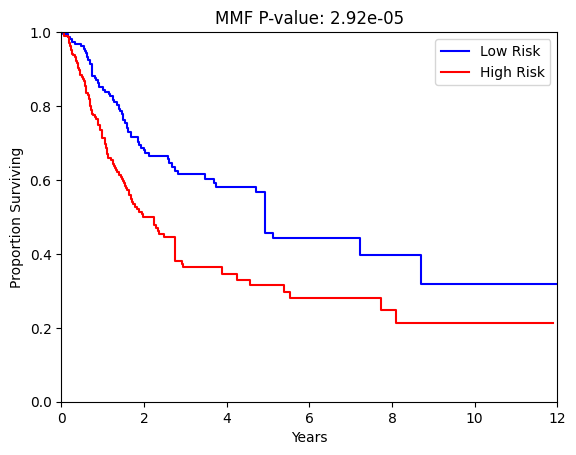

In [74]:

ax = plt.subplot(111)
kmf = KaplanMeierFitter()
kmf.fit(list(L/12), event_observed = list(LC), label = 'Low Risk')
kmf.plot(ax = ax,ci_show=False,color='blue')
kmf = KaplanMeierFitter()
kmf.fit(list(H/12), event_observed = list(HC), label = 'High Risk')
kmf.plot(ax = ax,ci_show=False,color='red')
plt.title('MMF P-value: 2.92e-05')
plt.xlabel("Years")
plt.ylabel("Proportion Surviving")
plt.xlim(0, 12)
plt.ylim(0,1)
#plt.savefig('/home/wbjeong/cancer/JJM/figures/BLCA/WSI/survival.pdf',bbox_inches='tight')

In [20]:
LC

case_id
TCGA-E7-A7DU    0
TCGA-MV-A51V    0
TCGA-XF-AAMZ    1
TCGA-XF-AAML    1
TCGA-GV-A3JV    1
               ..
TCGA-CF-A47Y    0
TCGA-XF-A8HF    1
TCGA-ZF-AA5P    0
TCGA-XF-A9SH    1
TCGA-XF-A9T0    0
Name: censorship, Length: 116, dtype: int64

In [72]:
XX=logrank_test(L,H,LC,HC)
XX.p_value

2.923149422425573e-05

In [149]:
BLCA_risk=BLCA_risk.drop_duplicates('Unnamed: 0')
samples=samples.drop_duplicates('case_id')
BLCA_risk['survival_months']=list(samples.loc[list(BLCA_risk.iloc[:,0]),:]['survival_months'])
BLCA_risk['censorship']=list(samples.loc[BLCA_risk.iloc[:,0],:]['censorship'])
BLCA_risk['label']=None
BLCA_risk.iloc[:172,-1]='High'
BLCA_risk.iloc[172:,-1]='Low'

In [150]:
BLCA_risk.to_csv('/home/wbjeong/cancer/JJM/results/SNN/BLCA/survival_snn.csv')

In [148]:
BLCA_risk

,Unnamed: 0,0,survival_months,censorship,label
42,TCGA-BP-4994,-3.999991,NaN,1,High
20,TCGA-B2-3923,-3.999991,NaN,1,High
32,TCGA-BP-4760,-3.999960,NaN,1,High
33,TCGA-BP-4795,-3.999946,NaN,1,High
26,TCGA-B8-5546,-3.999945,NaN,1,High
...,...,...,...,...,...
28,TCGA-B8-4620,-0.002886,NaN,1,Low
16,TCGA-B0-5096,-0.000959,NaN,0,Low
15,TCGA-B0-5095,-0.000832,NaN,0,Low
10,TCGA-B0-4810,-0.000290,NaN,0,Low


In [58]:
samples.index=samples['case_id']
H=samples.loc[high_list,:]['survival_months']
HC=samples.loc[high_list,:]['censorship']
L=samples.loc[low_list,:]['survival_months']
LC=samples.loc[low_list,:]['censorship']

In [42]:
samples.index=samples['case_id']
H=samples.loc[high.iloc[:,0],:]['survival_months']
HC=samples.loc[high.iloc[:,0],:]['censorship']
L=samples.loc[low.iloc[:,0],:]['survival_months']
LC=samples.loc[low.iloc[:,0],:]['censorship']

In [100]:
samples.columns[:15]

Index(['Unnamed: 0', 'case_id', 'slide_id', 'age', 'site', 'survival_months',
       'censorship', 'is_female', 'oncotree_code', 'train', 'AAK1_rnaseq',
       'AATK_rnaseq', 'ABCB1_rnaseq', 'ABCG2_rnaseq', 'ABI1_rnaseq'],
      dtype='object')

In [75]:
L

case_id
TCGA-AS-3778      1.41
TCGA-BP-5195     24.61
TCGA-B0-5116     41.85
TCGA-B8-A54K     15.41
TCGA-BP-4968     57.36
                 ...  
TCGA-B0-4821     40.41
TCGA-AK-3429    109.33
TCGA-CJ-4638     14.16
TCGA-DV-A4VX     53.42
TCGA-B8-4620     25.53
Name: survival_months, Length: 176, dtype: float64

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

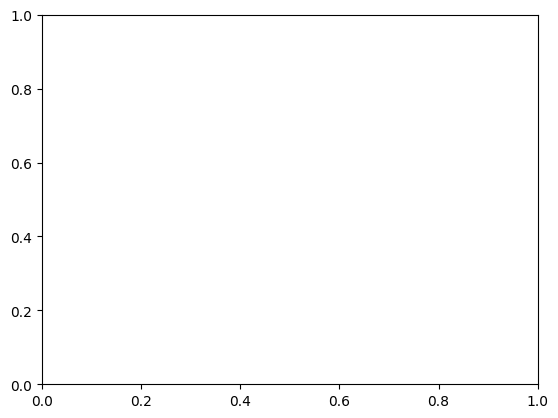

In [152]:

ax = plt.subplot(111)
kmf = KaplanMeierFitter()
kmf.fit(list(L/12), event_observed = list(LC), label = 'Low Risk')
kmf.plot(ax = ax,ci_show=False,color='blue')
kmf = KaplanMeierFitter()
kmf.fit(list(H/12), event_observed = list(HC), label = 'High Risk')
kmf.plot(ax = ax,ci_show=False,color='red')
plt.title('SNN P-value: 0.006303')
plt.xlabel("Years")
plt.ylabel("Proportion Surviving")
plt.xlim(0, 12)

In [123]:
XX=logrank_test(L,H,LC,HC)

In [175]:
XX=logrank_test(L,H,LC,HC)
XX.p_value

0.0007551063384592162

In [176]:
XX

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.35 <0.005     10.37